In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [10]:
#1. Normalize an image using the following steps:
#Loads an image in grayscale mode using OpenCV.
image = cv2.imread('../IMAGES/Maltese.bmp', 0)
image.shape

(2446, 2238)

In [12]:
#Converts the image to floating point representation for calculations.
image_float = image.astype(np.float32)

In [14]:
#Calculates the minimum and maximum pixel values in the image.
min_px = image.min()
max_px = image.max()

min_val = np.min(image_float)
max_val = np.max(image_float)

In [16]:
#Normalizes the image using the formula ((image_float - min_val) / (max_val - min_val))*R.
#if R=256, it will Scale the normalized image to the 0-255 range.
R = 256  # Scale factor
normalized_image = ((image_float - min_px) / (max_px - min_px)) * R

In [18]:
#Displays the original and normalized images using OpenCV.
cv2.imshow('Original Image', image)
cv2.imshow('Normalized Image', normalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

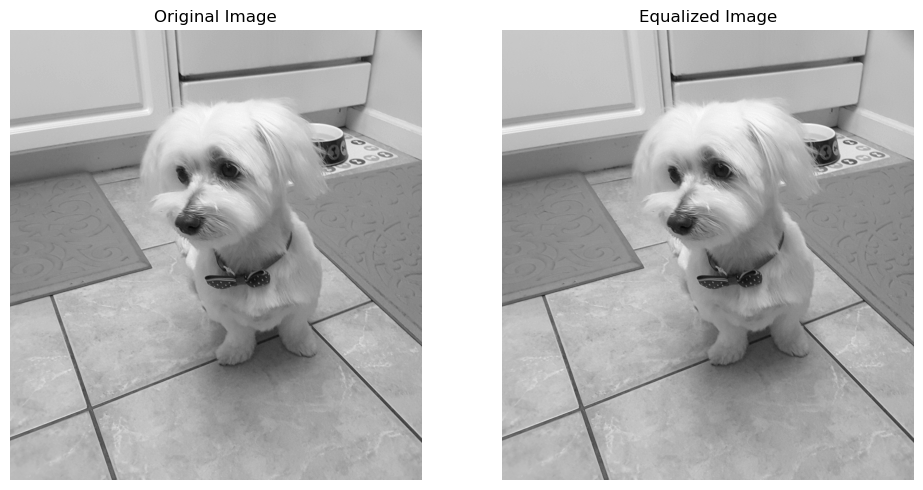

In [24]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [30]:
#2.  Image Encryption: Encrypt the image
#Load the input grayscale image using an image processing library like OpenCV.

image2 = cv2.imread('../IMAGES/CLina.jpg', 0)
image2.shape

(512, 512)

In [32]:
#Generate a random key matrix of the same size as the input image. Each element in the key matrix should be a random integer between 0 and 255.
matrix = np.random.randint(0, 256, size=(512, 512), dtype=np.uint8)
matrix

array([[140, 175, 118, ..., 231, 138, 244],
       [249, 199,  95, ...,   8,  57, 214],
       [133, 176, 228, ...,   9,  31,  13],
       ...,
       [223,  21,  61, ...,  70,  87,  98],
       [144,  43, 145, ..., 100, 164,  98],
       [115, 180,  34, ..., 140, 147, 249]], dtype=uint8)

In [34]:
#Perform element-wise addition of the input image and the key matrix.
sum_matrix = image2 + matrix
sum_matrix

array([[ 43,  75,  25, ..., 142,  28, 113],
       [152, 100,   2, ..., 176, 204,  82],
       [ 35,  77, 135, ..., 180, 179, 133],
       ...,
       [  5,  66, 105, ..., 167, 186, 192],
       [184,  84, 190, ..., 201,  11, 198],
       [160, 214,  90, ..., 241, 251,  96]], dtype=uint8)

In [36]:
#Take the modulo 256 of each sum to ensure the result stays within the 0-255 range.
encrypted_image = sum_matrix%256
encrypted_image = encrypted_image.astype(np.uint8)
encrypted_image

array([[ 43,  75,  25, ..., 142,  28, 113],
       [152, 100,   2, ..., 176, 204,  82],
       [ 35,  77, 135, ..., 180, 179, 133],
       ...,
       [  5,  66, 105, ..., 167, 186, 192],
       [184,  84, 190, ..., 201,  11, 198],
       [160, 214,  90, ..., 241, 251,  96]], dtype=uint8)

In [38]:
#The resulting matrix represents the encrypted image.
cv2.imwrite('../IMAGES/encrypted_image.jpg', encrypted_image)
cv2.imshow("Encrypted Image", encrypted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
#Decryption: Decrypt the Image
#Perform element-wise subtraction of the encrypted image and the key matrix.
decrypt_matrix = encrypted_image - matrix 
decrypt_matrix

array([[159, 156, 163, ..., 167, 146, 125],
       [159, 157, 163, ..., 168, 147, 124],
       [158, 157, 163, ..., 171, 148, 120],
       ...,
       [ 38,  45,  44, ...,  97,  99,  94],
       [ 40,  41,  45, ..., 101, 103, 100],
       [ 45,  34,  56, ..., 101, 104, 103]], dtype=uint8)

In [42]:
#Take the modulo 256 of each difference to ensure the result stays within the 0-255 range.
decrypted_image = decrypt_matrix % 256
decrypted_image = decrypted_image.astype(np.uint8)
decrypted_image

array([[159, 156, 163, ..., 167, 146, 125],
       [159, 157, 163, ..., 168, 147, 124],
       [158, 157, 163, ..., 171, 148, 120],
       ...,
       [ 38,  45,  44, ...,  97,  99,  94],
       [ 40,  41,  45, ..., 101, 103, 100],
       [ 45,  34,  56, ..., 101, 104, 103]], dtype=uint8)

In [44]:
#The resulting matrix represents the decrypted image.
#Display the original input image, the encrypted image, and the decrypted image for comparison.
cv2.imshow('Original Image', image2)
cv2.imshow('Encrypted Image', encrypted_image)
cv2.imshow('Decrypted Image', decrypted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Verify that the decrypted image matches the original input image, confirming the correctness of the encryption and decryption process.